#### COMPANION WORKBOOK

# Principal Component Analysis

To make the most out of this program, we strongly recommend you to:
1. First practice writing and implementing all of the code from Coding Section of the online module.
2. Then, freely experiment with and explore any interesting or confusing concepts. Simply insert new code cells and then use the help of Google and official documentation.
3. Finally, tackle all of the exercises at the end. They will help you tie everything together and **learn in context.**

#### <span style="color:#555">MODULE CODE SANDBOX</span>

Use this space to practice writing and implementing all of the code from Coding Section of the online module. Insert new code cells as needed, and feel free to write notes to yourself in Markdown.

## I. Prep Work

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

from sklearn.preprocessing import StandardScaler

from sklearn.decomposition import PCA

In [2]:
item_data = pd.read_csv('euro_item_data.csv', index_col=0)

In [3]:
# features are the number of columns in a data set, this one has hella because we included a
# dummy variable for all of the various items sold by the online retailer

item_data.shape

(414, 2574)

item_data.shape

## II. Simulation: Oval Blob

In [4]:
# np.random.normal(center of distribution, sd of deviation, size=100)

np.random.seed(101)

x1 = np.random.normal(0, 1, 100)
x2 = x1 + np.random.normal(0, 1, 100)

In [5]:
# this makes it so these random numbers are put into an object w two columns and 100 rows

X = np.stack([x1, x2], axis=1)
print( X.shape )

(100, 2)


In [6]:
print( X[:5] )

[[ 2.70684984  4.3136297 ]
 [ 0.62813271 -0.48757726]
 [ 0.90796945 -0.47740911]
 [ 0.50382575 -0.82583431]
 [ 0.65111795  0.69257789]]


In [7]:
# I don't really understand what a scaler means here
# ask 4 help today (Wednesday)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
print( X_scaled[:5] )

[[ 2.45737416  2.76968241]
 [ 0.44665735 -0.38363275]
 [ 0.71733989 -0.37695455]
 [ 0.3264168  -0.60579169]
 [ 0.46889068  0.39146426]]


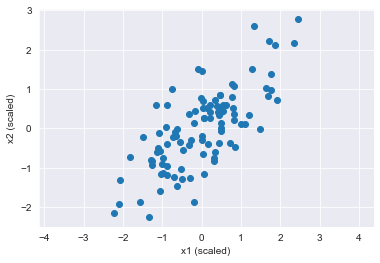

In [8]:
plt.scatter(X_scaled[:,0], X_scaled[:,1])
plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('x2 (scaled)')

plt.show()

## III. Principal Components

In [9]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [10]:
print( pca.components_ )

[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


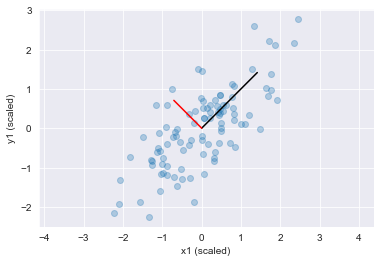

In [11]:
plt.scatter(X_scaled[:,0], X_scaled[:,1], alpha=0.3)
plt.plot([0, 2*pca.components_[0,0]], [0, 2*pca.components_[0,1]], 'k')
plt.plot([0, pca.components_[1,0]], [0, pca.components_[1,1]], 'r')

plt.axis('equal')
plt.xlabel('x1 (scaled)')
plt.ylabel('y1 (scaled)')
plt.show()

In [12]:
PC = pca.transform(X_scaled)

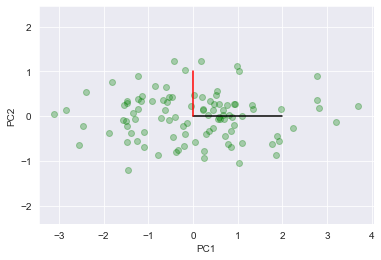

In [13]:
plt.scatter(PC[:,0], PC[:,1], alpha=0.3, color='g')
plt.plot([0, 2], [0, 0], 'k')
plt.plot([0, 0], [0, 1], 'r')

plt.axis('equal')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

## IV. Dimensionality Reduction

In [14]:
print( pca.explained_variance_ratio_ )

[0.86915841 0.13084159]


In [15]:
pca = PCA(n_components=1)
pca.fit(X_scaled)

PCA(n_components=1)

In [16]:
PC = pca.transform(X_scaled)
print( PC.shape )

(100, 1)


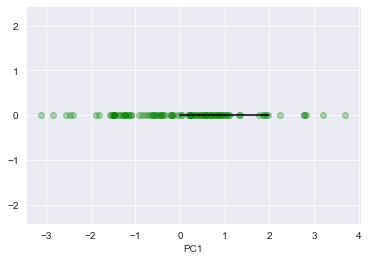

In [17]:
plt.scatter(PC[:,0], len(PC)*[0], alpha=0.3, color='g')
plt.plot([0, 2], [0, 0], 'k')

plt.axis('equal')
plt.xlabel('PC1')

plt.show()

#### <span style="color:#555">EXERCISES</span>

Complete each of the following exercises.

## <span style="color:RoyalBlue">Exercise 3.1 - Item Data PCA</span>

We can use the exact same process we just saw in the Coding Section perform PCA on our project's item data.

#### A.) First, scale <code style="color:crimson">item_data</code>, which you should have read in earlier during the Coding Section.
* Name the scaled dataset <code style="color:crimson">item_data_scaled</code>.
* Then, display the first 5 rows. 
    * You can't use <code style="color:steelblue">.head()</code> because it's not a dataframe.
    * You must **index/slice the array** instead.

In [19]:
scaler = StandardScaler()
item_data_scaled = scaler.fit_transform(item_data)
print( item_data_scaled[:5] )

[[-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.68068072]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
   0.38776219]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848  5.53128397
   0.65487292]]


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[[-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.68068072]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
   0.38776219]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848 -0.15568183
  -0.41356999]
 [-0.13303802 -0.04920678 -0.1119152  ... -0.10482848  5.53128397
   0.65487292]]
</pre>

#### B.) Next, initialize and fit an instance of the PCA transformation.
* Keep all of the components for now (just don't pass in any argument).

In [20]:
pca = PCA()
pca.fit(item_data_scaled)

PCA()

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)
</pre>

#### C.) Finally, generate new "principal component features" from <code style="color:crimson">item_data_scaled</code>.
* Name the new array <code style="color:crimson">PC_items</code>.
* Then, display the first 5 rows.

In [21]:
PC_items = pca.transform(item_data_scaled)
print( PC_items[:5])

[[ 5.87614052e+00  4.82891689e+00 -4.95545069e-01 ... -6.62646278e-04
  -4.43629806e-05  3.57699981e-15]
 [-4.21983747e+00  1.22621722e+00 -1.88191211e+00 ... -2.11471782e-04
  -2.69154340e-04  7.25981775e-16]
 [-1.26084676e+00  2.38766371e+00 -7.31483440e-02 ...  2.57750179e-04
  -2.05682324e-04  3.13030851e-15]
 [-4.92931983e+00 -7.14858724e-01 -1.58093026e+00 ... -1.98603886e-03
   9.92316312e-05 -1.24032729e-16]
 [-2.05311348e+00  2.11095022e+00  1.84807021e-01 ... -3.43415269e-04
  -1.32981672e-04  6.64746036e-15]]


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
[[ 5.87614052e+00  4.82891689e+00 -4.95545069e-01 ... -6.62646278e-04
  -4.43629806e-05  7.79931675e-15]
 [-4.21983747e+00  1.22621722e+00 -1.88191211e+00 ... -2.11471782e-04
  -2.69154340e-04 -4.33507397e-15]
 [-1.26084676e+00  2.38766371e+00 -7.31483440e-02 ...  2.57750179e-04
  -2.05682324e-04 -5.17554749e-15]
 [-4.92931983e+00 -7.14858724e-01 -1.58093026e+00 ... -1.98603886e-03
   9.92316312e-05 -9.78991194e-15]
 [-2.05311348e+00  2.11095022e+00  1.84807021e-01 ... -3.43415269e-04
  -1.32981672e-04  2.77555756e-17]]
</pre>

## <span style="color:RoyalBlue">Exercise 3.2 - Explained Variance</span>

Earlier, we already saw how to display the **explained variance ratio** for each of the principal components.
* First of all, they should sum to 1.0
* (Or very close to it... sometimes there are rounding quirks)

#### A.) Confirm the sum of the explained variance ratios for your principal components is 1 (or very close to it).

In [22]:
pca.explained_variance_ratio_.sum()

0.9999999999999999

And remember, the PCA finds a **sequence** of principal components that try to explain as much variance as possible.
* $PC1$ would explain the most variance.
* $PC2$ would explain the 2nd-most variance.
* $PC3$ would explain the 3rd-most variance.
* And so on...

#### B.) Therefore, it's very helpful to calculate and plot the <u>cumulative</u> explained variance.
* This will tell us the total amount of variance we'd capture if we kept up to the n-th component.
* First, take the <code style="color:steelblue">np.cumsum()</code> to calculate the cumulative explained variance. Feel free to play around with this function to see how it works.
* Then, we'll plot it so we can see how many $PC$ features we'd need to keep in order to capture most of the original variance.

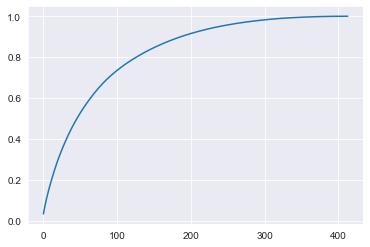

In [23]:
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)
plt.show()

<strong style="color:RoyalBlue">Expected output:</strong>
<img src="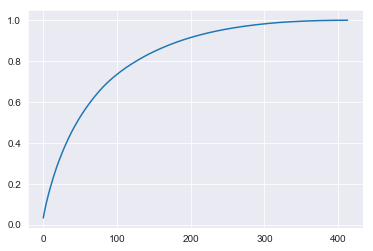&#10;">

This chart is saying: To capture about 80% of the variance, we'd need to keep around 125 components.

#### C.) Display the cumulative explained variance of the first 125 components.

In [24]:
print( cumulative_explained_variance[124])

0.79550690322054


<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
0.7955069032205401
</pre>

## <span style="color:RoyalBlue">Exercise 3.3 - Dimensionality Reduction With PCA</span>

Reducing 2574 features down to 125 (about 95% fewer features) while capturing almost 80% of the original variance is certainly not bad! 

#### A.) Initialize and fit another PCA transformation.
* This time, only keep 125 components.
* Generate the principal component features from the fitted instance and name the new matrix <code style="color:crimson">PC_items</code>.
* Then, display the shape of <code style="color:crimson">PC_items</code> to confirm it only has 125 features.

In [25]:
pca = PCA(n_components=125)
PC_items = pca.fit_transform(item_data_scaled)
PC_items.shape

(414, 125)

<strong style="color:RoyalBlue">Expected output:</strong>
<pre>
(414, 125)
</pre>

#### B.) Next, for convenience, put <code style="color:crimson">PC_items</code> into a new dataframe.
* Name the columns PC1, PC2, PC3, etc...
* Update its index to be the same as the orginal <code style="color:crimson">item_data</code>'s index.
* Then display its first 5 rows.

In [26]:
items_pca = pd.DataFrame(PC_items)
items_pca.columns = ['PC{}'.format(i + 1) for i in range (PC_items.shape[1])]
items_pca.index = item_data.index
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC76,PC77,PC78,PC79,PC80,PC81,PC82,PC83,PC84,PC85,PC86,PC87,PC88,PC89,PC90,PC91,PC92,PC93,PC94,PC95,PC96,PC97,PC98,PC99,PC100,PC101,PC102,PC103,PC104,PC105,PC106,PC107,PC108,PC109,PC110,PC111,PC112,PC113,PC114,PC115,PC116,PC117,PC118,PC119,PC120,PC121,PC122,PC123,PC124,PC125
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828892,-0.495543,3.093843,-0.633702,-11.534085,2.161913,7.116797,5.336110,4.424089,4.636927,2.316653,12.310852,1.986991,-11.431419,5.617585,-2.176671,7.665909,-12.135775,-16.048472,-5.949797,7.814681,40.516405,-35.575430,-17.557308,6.869688,20.887952,2.297487,-26.156289,-32.582130,7.883801,12.353973,6.831575,-32.955725,-4.408426,-17.235243,-11.275285,-14.490191,-2.763643,4.734708,-6.984515,-1.460754,10.600410,1.241669,3.095624,5.331731,-0.417450,1.527353,-6.409488,3.056646,...,2.311696,2.528281,-1.020094,-1.826817,-1.782002,1.250666,0.268078,-1.713217,1.675448,-3.594813,0.524752,-1.873924,0.624251,0.238212,1.119833,-1.800831,0.666073,0.233571,-0.150078,0.842559,-0.364235,-0.573426,-0.062462,0.622033,0.037471,-0.811016,1.602420,0.104307,-0.153327,-0.251323,0.410751,-0.485748,-0.138471,1.202081,0.414028,0.565478,-0.655107,1.073001,-0.057048,0.240346,-0.007766,-0.779199,0.613359,-0.330509,-0.004962,-0.045697,0.148163,-0.061750,-0.198612,-0.269058
12348,-4.219839,1.226195,-1.881922,-0.174302,0.817768,1.160852,-0.871961,-0.846827,0.460120,0.854323,-0.401760,0.981605,-1.104198,0.770226,-0.092707,-0.313275,-0.448938,1.207543,0.381764,-0.468900,0.183725,0.054173,0.501489,0.373975,1.226069,-0.771832,-0.269968,0.851287,-0.371127,-0.578059,1.010339,-0.582769,0.946070,-0.736183,0.355560,-0.385273,-0.297174,0.397002,0.153127,0.334103,-0.458112,0.706996,1.212702,-0.199148,-0.861671,-0.067365,-0.417001,-1.614081,-0.364249,0.454946,...,-1.003771,-0.888863,-0.530779,-0.277437,0.036027,0.129662,-0.561206,-0.394906,-0.629814,0.319792,0.236758,0.148990,-1.854245,0.124591,-0.416596,-0.741901,0.207915,0.994749,-0.156038,1.087600,0.081404,0.413462,1.287041,1.002995,-0.653275,0.790626,-0.720898,-0.457527,-1.722533,-1.502235,1.066439,-0.696565,2.011565,-0.602318,-0.767082,-0.245528,0.569452,-0.933205,1.556439,-1.138468,-1.904435,0.075644,-0.955823,1.409611,0.724342,0.464916,1.907702,-1.416770,1.121250,-2.946993
12349,-1.260838,2.387828,-0.073097,-1.118903,-0.034546,-3.715325,-0.342738,-0.149002,-0.789685,-0.377883,1.568210,0.182048,0.221997,-0.050455,3.179876,-0.513626,-1.838726,0.382550,0.318497,-0.005705,-0.413850,0.456688,-0.789146,1.754879,-1.482831,0.752196,-0.917753,0.767206,0.487542,-1.349293,0.287530,0.645437,0.070297,-0.218669,-0.667523,-1.540909,0.790748,-1.412095,-0.092946,-0.922501,0.075750,-0.097580,-0.162106,0.704347,1.397955,-0.256310,-0.132071,-0.193963,0.844302,1.671131,...,2.024681,-0.915472,1.982239,0.634441,0.648187,0.191702,-1.109805,1.052615,-1.183430,-0.544985,1.395267,1.571042,-2.602249,-2.140487,1.167780,-2.044468,-2.057936,-2.018433,-1.913184,-1.861216,-0.138171,-1.027463,1.863885,0.085432,0.376080,1.989101,-1.386937,-1.450922,2.876608,-1.125522,-0.047045,-2.985383,2.003770,0.914071,-1.002057,-0.012691,2.621160,-2.022646,-0.626575,0.658062,4.595645,-4.527504,-2.370799,-3.396166,-3.419379,-1.304617,3.845541,0.807568,-4.652684,2.594639
12350,-4.929319,-0.714874,-1.581119,-0.469789,-0.116164,0.647736,0.112682,-1.336327,1.547287,-1.190830,-0.212845,1.057421,-0.474587,0.856864,-1.305032,0.243091,0.269373,1.954158,-0.229004,0.571653,-0.186408,0.904185,1.363480,0.176493,-0.261888,-0.164701,-0.682527,1.081079,-0.153103,-0.397770,0.240457,0.632403,-1.450379,-0.181967,-0.315697,-0.307000,-1.360443,-0.004263,0.585065,-0.250773,0.589736,-0.216347,0.283305,0.514181,-0.522224,-0.102391,-1.468632,0.153

<strong style="color:RoyalBlue">Expected output:</strong>

<table border="1" class="dataframe">
  <thead>
    <tr style="text-align: right;">
      <th></th>
      <th>PC1</th>
      <th>PC2</th>
      <th>PC3</th>
      <th>PC4</th>
      <th>PC5</th>
      <th>PC6</th>
      <th>PC7</th>
      <th>PC8</th>
      <th>PC9</th>
      <th>PC10</th>
      <th>PC11</th>
      <th>PC12</th>
      <th>PC13</th>
      <th>PC14</th>
      <th>PC15</th>
      <th>PC16</th>
      <th>PC17</th>
      <th>PC18</th>
      <th>PC19</th>
      <th>PC20</th>
      <th>PC21</th>
      <th>PC22</th>
      <th>PC23</th>
      <th>PC24</th>
      <th>PC25</th>
      <th>PC26</th>
      <th>PC27</th>
      <th>PC28</th>
      <th>PC29</th>
      <th>PC30</th>
      <th>PC31</th>
      <th>PC32</th>
      <th>PC33</th>
      <th>PC34</th>
      <th>PC35</th>
      <th>PC36</th>
      <th>PC37</th>
      <th>PC38</th>
      <th>PC39</th>
      <th>PC40</th>
      <th>PC41</th>
      <th>PC42</th>
      <th>PC43</th>
      <th>PC44</th>
      <th>PC45</th>
      <th>PC46</th>
      <th>PC47</th>
      <th>PC48</th>
      <th>PC49</th>
      <th>PC50</th>
      <th>...</th>
      <th>PC76</th>
      <th>PC77</th>
      <th>PC78</th>
      <th>PC79</th>
      <th>PC80</th>
      <th>PC81</th>
      <th>PC82</th>
      <th>PC83</th>
      <th>PC84</th>
      <th>PC85</th>
      <th>PC86</th>
      <th>PC87</th>
      <th>PC88</th>
      <th>PC89</th>
      <th>PC90</th>
      <th>PC91</th>
      <th>PC92</th>
      <th>PC93</th>
      <th>PC94</th>
      <th>PC95</th>
      <th>PC96</th>
      <th>PC97</th>
      <th>PC98</th>
      <th>PC99</th>
      <th>PC100</th>
      <th>PC101</th>
      <th>PC102</th>
      <th>PC103</th>
      <th>PC104</th>
      <th>PC105</th>
      <th>PC106</th>
      <th>PC107</th>
      <th>PC108</th>
      <th>PC109</th>
      <th>PC110</th>
      <th>PC111</th>
      <th>PC112</th>
      <th>PC113</th>
      <th>PC114</th>
      <th>PC115</th>
      <th>PC116</th>
      <th>PC117</th>
      <th>PC118</th>
      <th>PC119</th>
      <th>PC120</th>
      <th>PC121</th>
      <th>PC122</th>
      <th>PC123</th>
      <th>PC124</th>
      <th>PC125</th>
    </tr>
    <tr>
      <th>CustomerID</th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
      <th></th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <th>12347</th>
      <td>5.876139</td>
      <td>4.828919</td>
      <td>-0.495576</td>
      <td>3.093819</td>
      <td>-0.633720</td>
      <td>-11.534014</td>
      <td>2.162002</td>
      <td>7.116986</td>
      <td>5.336023</td>
      <td>4.424470</td>
      <td>4.637031</td>
      <td>2.316383</td>
      <td>12.310674</td>
      <td>1.986675</td>
      <td>-11.431187</td>
      <td>5.617897</td>
      <td>-2.177509</td>
      <td>7.665813</td>
      <td>-12.136167</td>
      <td>-16.048516</td>
      <td>-5.949493</td>
      <td>7.814043</td>
      <td>40.517798</td>
      <td>-35.576430</td>
      <td>-17.555304</td>
      <td>6.869171</td>
      <td>20.884880</td>
      <td>2.296198</td>
      <td>-26.159340</td>
      <td>-32.580427</td>
      <td>7.877074</td>
      <td>12.361248</td>
      <td>6.822797</td>
      <td>-32.957383</td>
      <td>-4.409545</td>
      <td>-17.239966</td>
      <td>-11.270995</td>
      <td>-14.491122</td>
      <td>-2.765195</td>
      <td>4.739963</td>
      <td>-6.982166</td>
      <td>-1.463791</td>
      <td>10.602073</td>
      <td>1.233104</td>
      <td>3.075597</td>
      <td>5.340897</td>
      <td>-0.406719</td>
      <td>1.610363</td>
      <td>-6.386440</td>
      <td>3.061723</td>
      <td>...</td>
      <td>-2.299790</td>
      <td>2.513680</td>
      <td>-0.952065</td>
      <td>-1.788642</td>
      <td>-1.926787</td>
      <td>1.378752</td>
      <td>0.491482</td>
      <td>-1.319042</td>
      <td>-2.182916</td>
      <td>-3.349223</td>
      <td>0.610716</td>
      <td>-2.016875</td>
      <td>0.584967</td>
      <td>0.260608</td>
      <td>1.017918</td>
      <td>-2.004075</td>
      <td>0.946660</td>
      <td>0.282960</td>
      <td>-0.462446</td>
      <td>-0.604835</td>
      <td>-0.601859</td>
      <td>-0.287790</td>
      <td>0.126981</td>
      <td>-0.489980</td>
      <td>0.133326</td>
      <td>-1.580536</td>
      <td>0.033797</td>
      <td>-0.228951</td>
      <td>-0.257209</td>
      <td>-0.506918</td>
      <td>0.200562</td>
      <td>-0.768241</td>
      <td>-0.129307</td>
      <td>-1.075736</td>
      <td>0.492443</td>
      <td>0.768737</td>
      <td>-0.195945</td>
      <td>1.236755</td>
      <td>-0.421214</td>
      <td>0.550725</td>
      <td>0.477246</td>
      <td>-0.093665</td>
      <td>-0.132381</td>
      <td>-0.598931</td>
      <td>0.464376</td>
      <td>0.044135</td>
      <td>0.113054</td>
      <td>0.587258</td>
      <td>-0.004927</td>
      <td>-0.705686</td>
    </tr>
    <tr>
      <th>12348</th>
      <td>-4.219835</td>
      <td>1.226197</td>
      <td>-1.881807</td>
      <td>-0.174287</td>
      <td>0.818146</td>
      <td>1.160581</td>
      <td>-0.871779</td>
      <td>-0.846750</td>
      <td>0.460552</td>
      <td>0.853995</td>
      <td>-0.402090</td>
      <td>0.981464</td>
      <td>-1.104360</td>
      <td>0.770383</td>
      <td>-0.093535</td>
      <td>-0.313461</td>
      <td>-0.448554</td>
      <td>1.207637</td>
      <td>0.380136</td>
      <td>-0.470236</td>
      <td>0.185555</td>
      <td>0.054274</td>
      <td>0.501135</td>
      <td>0.374927</td>
      <td>1.225062</td>
      <td>-0.773723</td>
      <td>-0.268373</td>
      <td>0.852358</td>
      <td>-0.375615</td>
      <td>-0.575326</td>
      <td>1.011847</td>
      <td>-0.584971</td>
      <td>0.950350</td>
      <td>-0.736063</td>
      <td>0.355259</td>
      <td>-0.391401</td>
      <td>-0.299580</td>
      <td>0.399383</td>
      <td>0.149346</td>
      <td>0.335482</td>
      <td>-0.470216</td>
      <td>0.703759</td>
      <td>1.204719</td>
      <td>-0.194707</td>
      <td>-0.860216</td>
      <td>-0.057528</td>
      <td>-0.428673</td>
      <td>-1.634744</td>
      <td>-0.401379</td>
      <td>0.447357</td>
      <td>...</td>
      <td>1.075152</td>
      <td>-0.885996</td>
      <td>-0.394850</td>
      <td>-0.388341</td>
      <td>-0.112575</td>
      <td>0.190940</td>
      <td>-0.727122</td>
      <td>-0.393271</td>
      <td>0.698652</td>
      <td>0.140081</td>
      <td>0.114198</td>
      <td>0.013574</td>
      <td>-1.963078</td>
      <td>-0.002766</td>
      <td>-0.627973</td>
      <td>-0.868631</td>
      <td>0.362769</td>
      <td>0.753832</td>
      <td>-0.919445</td>
      <td>-0.913023</td>
      <td>-0.469838</td>
      <td>0.213609</td>
      <td>0.960496</td>
      <td>-1.471053</td>
      <td>0.591229</td>
      <td>0.248896</td>
      <td>-1.320578</td>
      <td>0.056540</td>
      <td>0.381385</td>
      <td>-0.989921</td>
      <td>2.049529</td>
      <td>-0.381216</td>
      <td>-0.842522</td>
      <td>1.165701</td>
      <td>0.196337</td>
      <td>-0.393332</td>
      <td>1.193519</td>
      <td>-0.945191</td>
      <td>-0.104509</td>
      <td>-0.342970</td>
      <td>-1.118329</td>
      <td>0.450240</td>
      <td>1.264876</td>
      <td>-2.394625</td>
      <td>-0.597552</td>
      <td>0.056982</td>
      <td>1.181935</td>
      <td>-0.745847</td>
      <td>-1.674422</td>
      <td>0.838219</td>
    </tr>
    <tr>
      <th>12349</th>
      <td>-1.260850</td>
      <td>2.387693</td>
      <td>-0.073592</td>
      <td>-1.119347</td>
      <td>-0.034620</td>
      <td>-3.715765</td>
      <td>-0.343766</td>
      <td>-0.149241</td>
      <td>-0.790514</td>
      <td>-0.379852</td>
      <td>1.570304</td>
      <td>0.184459</td>
      <td>0.224107</td>
      <td>-0.049690</td>
      <td>3.178614</td>
      <td>-0.510527</td>
      <td>-1.838968</td>
      <td>0.382890</td>
      <td>0.320425</td>
      <td>-0.000563</td>
      <td>-0.418516</td>
      <td>0.455285</td>
      <td>-0.784131</td>
      <td>1.754743</td>
      <td>-1.481886</td>
      <td>0.761234</td>
      <td>-0.911687</td>
      <td>0.769651</td>
      <td>0.501286</td>
      <td>-1.350149</td>
      <td>0.286573</td>
      <td>0.668142</td>
      <td>0.088604</td>
      <td>-0.225389</td>
      <td>-0.672403</td>
      <td>-1.540346</td>
      <td>0.783440</td>
      <td>-1.429222</td>
      <td>-0.100891</td>
      <td>-0.913283</td>
      <td>0.089993</td>
      <td>-0.099184</td>
      <td>-0.148304</td>
      <td>0.714839</td>
      <td>1.384306</td>
      <td>-0.251712</td>
      <td>-0.135864</td>
      <td>-0.189798</td>
      <td>0.893525</td>
      <td>1.747417</td>
      <td>...</td>
      <td>-1.974726</td>
      <td>-0.682674</td>
      <td>1.751662</td>
      <td>0.719517</td>
      <td>1.181937</td>
      <td>-0.436877</td>
      <td>-1.092533</td>
      <td>0.877481</td>
      <td>1.346978</td>
      <td>-0.664037</td>
      <td>1.990684</td>
      <td>0.528912</td>
      <td>-3.151697</td>
      <td>-2.694311</td>
      <td>0.717262</td>
      <td>-2.959424</td>
      <td>-0.937799</td>
      <td>-2.505427</td>
      <td>-0.540515</td>
      <td>1.891591</td>
      <td>-0.936601</td>
      <td>-0.670643</td>
      <td>1.223702</td>
      <td>-0.999799</td>
      <td>-1.515290</td>
      <td>3.439102</td>
      <td>0.652773</td>
      <td>-1.160981</td>
      <td>-1.372232</td>
      <td>0.569810</td>
      <td>0.837082</td>
      <td>-1.694439</td>
      <td>0.086404</td>
      <td>1.578272</td>
      <td>-2.498455</td>
      <td>0.675904</td>
      <td>-3.696415</td>
      <td>-4.586849</td>
      <td>-0.016794</td>
      <td>-0.048980</td>
      <td>3.014502</td>
      <td>3.157718</td>
      <td>0.217122</td>
      <td>-1.559279</td>
      <td>-2.309488</td>
      <td>-1.205159</td>
      <td>0.779501</td>
      <td>1.022429</td>
      <td>-2.657554</td>
      <td>-3.139405</td>
    </tr>
    <tr>
      <th>12350</th>
      <td>-4.929324</td>
      <td>-0.714881</td>
      <td>-1.580905</td>
      <td>-0.469628</td>
      <td>-0.116130</td>
      <td>0.647951</td>
      <td>0.112923</td>
      <td>-1.336538</td>
      <td>1.547586</td>
      <td>-1.190258</td>
      <td>-0.213562</td>
      <td>1.056837</td>
      <td>-0.474706</td>
      <td>0.856206</td>
      <td>-1.305063</td>
      <td>0.241944</td>
      <td>0.267788</td>
      <td>1.952874</td>
      <td>-0.229158</td>
      <td>0.569757</td>
      <td>-0.186558</td>
      <td>0.905056</td>
      <td>1.364263</td>
      <td>0.176833</td>
      <td>-0.259845</td>
      <td>-0.170101</td>
      <td>-0.681366</td>
      <td>1.080436</td>
      <td>-0.154195</td>
      <td>-0.399581</td>
      <td>0.237663</td>
      <td>0.637015</td>
      <td>-1.453187</td>
      <td>-0.188388</td>
      <td>-0.317550</td>
      <td>-0.301132</td>
      <td>-1.355587</td>
      <td>-0.002659</td>
      <td>0.581116</td>
      <td>-0.251692</td>
      <td>0.583175</td>
      <td>-0.217350</td>
      <td>0.276234</td>
      <td>0.526579</td>
      <td>-0.532536</td>
      <td>-0.102541</td>
      <td>-1.465603</td>
      <td>0.143068</td>
      <td>0.161026</td>
      <td>-0.683773</td>
      <td>...</td>
      <td>-1.489476</td>
      <td>-0.218642</td>
      <td>0.527675</td>
      <td>0.547451</td>
      <td>-0.544065</td>
      <td>0.008449</td>
      <td>-1.720628</td>
      <td>0.103113</td>
      <td>0.787892</td>
      <td>-0.137139</td>
      <td>0.345981</td>
      <td>0.110370</td>
      <td>-0.081073</td>
      <td>-0.126282</td>
      <td>-0.280256</td>
      <td>0.426675</td>
      <td>0.016736</td>
      <td>-0.542474</td>
      <td>-0.273434</td>
      <td>-0.869338</td>
      <td>0.296720</td>
      <td>-0.938618</td>
      <td>-0.017180</td>
      <td>0.618351</td>
      <td>0.886553</td>
      <td>-0.019835</td>
      <td>0.432270</td>
      <td>-0.163283</td>
      <td>0.407493</td>
      <td>-0.287149</td>
      <td>-0.367984</td>
      <td>-0.318446</td>
      <td>-0.295609</td>
      <td>-0.441938</td>
      <td>0.588675</td>
      <td>-1.429122</td>
      <td>0.438419</td>
      <td>0.974052</td>
      <td>0.287357</td>
      <td>-0.084308</td>
      <td>-1.312471</td>
      <td>-0.112915</td>
      <td>-0.250058</td>
      <td>0.165253</td>
      <td>-1.588285</td>
      <td>-0.204711</td>
      <td>-0.434233</td>
      <td>-0.552577</td>
      <td>0.704213</td>
      <td>-0.231500</td>
    </tr>
    <tr>
      <th>12352</th>
      <td>-2.053112</td>
      <td>2.110892</td>
      <td>0.185177</td>
      <td>0.127892</td>
      <td>0.087371</td>
      <td>-1.944378</td>
      <td>2.383044</td>
      <td>0.899789</td>
      <td>-0.673269</td>
      <td>0.081561</td>
      <td>0.877573</td>
      <td>1.051750</td>
      <td>-0.742041</td>
      <td>-2.071104</td>
      <td>-0.636386</td>
      <td>0.023601</td>
      <td>0.116229</td>
      <td>0.573154</td>
      <td>-0.030801</td>
      <td>0.104478</td>
      <td>-0.695487</td>
      <td>-0.910470</td>
      <td>-2.329782</td>
      <td>0.522606</td>
      <td>-1.763515</td>
      <td>0.219057</td>
      <td>-1.061897</td>
      <td>-1.805516</td>
      <td>-0.925079</td>
      <td>2.105799</td>
      <td>-0.149693</td>
      <td>2.225720</td>
      <td>2.248725</td>
      <td>-0.587264</td>
      <td>2.455473</td>
      <td>1.374456</td>
      <td>0.192964</td>
      <td>-0.411959</td>
      <td>1.814217</td>
      <td>1.232006</td>
      <td>-0.953107</td>
      <td>-0.850772</td>
      <td>-1.119290</td>
      <td>-0.103044</td>
      <td>-0.908538</td>
      <td>-2.178999</td>
      <td>-1.581740</td>
      <td>-1.488777</td>
      <td>0.988304</td>
      <td>0.254810</td>
      <td>...</td>
      <td>-1.133629</td>
      <td>-0.074228</td>
      <td>2.355424</td>
      <td>-3.488223</td>
      <td>0.930109</td>
      <td>0.199648</td>
      <td>-1.115531</td>
      <td>2.370735</td>
      <td>0.125739</td>
      <td>-2.818952</td>
      <td>-2.469808</td>
      <td>1.705093</td>
      <td>1.025638</td>
      <td>-6.319406</td>
      <td>-0.193987</td>
      <td>-5.319405</td>
      <td>-3.286564</td>
      <td>-0.060488</td>
      <td>-0.003244</td>
      <td>7.709652</td>
      <td>-3.833604</td>
      <td>1.172743</td>
      <td>-8.338069</td>
      <td>-2.122835</td>
      <td>-4.533050</td>
      <td>-8.857868</td>
      <td>3.884318</td>
      <td>-2.264711</td>
      <td>-11.423992</td>
      <td>-3.427210</td>
      <td>-5.665981</td>
      <td>-7.264687</td>
      <td>15.761462</td>
      <td>6.252412</td>
      <td>10.012591</td>
      <td>9.448491</td>
      <td>7.144877</td>
      <td>12.862592</td>
      <td>-2.658936</td>
      <td>-4.955505</td>
      <td>-1.530380</td>
      <td>-0.782080</td>
      <td>0.144451</td>
      <td>0.897337</td>
      <td>8.027275</td>
      <td>1.408362</td>
      <td>-8.095058</td>
      <td>3.176835</td>
      <td>0.385277</td>
      <td>-0.996062</td>
    </tr>
  </tbody>
</table>

Now we have a dataframe of **125 customer-level principal component features**. These were generated from the 125 principal components that explained the most variance for the original features. The index of this PCA item dataframe contains CustomerID's, which will make it possible for us to join this to our analytical base table from <span style="color:royalblue">Module 1</span>.

#### C.) Finally, save this item dataframe with PCA features as <code style="color:crimson">'pca_item_data.csv'</code>.
* In our Clustering Analysis module, we'll compare the clusters made from using these features against those in <code style="color:crimson">'threshold_item_data.csv'</code>.
* Do **not** set <code style="color:steelblue">index=None</code> because we want to keep the CustomerID's as the index.

In [27]:
items_pca.to_csv('pca_item_data.csv')

Congratulations for making it through the Principal Component Analysis module! As a reminder, here are a few things you did in this module:
* You saw how PCA works on an oval blob.
* You contrasted plots of the original features against plots of the principal component features.
* You learned how to intepret cumulative explained variance.
* And you reduced the dimensionality of the item dataset using PCA.

In the next module, we'll take a closer look at clustering algorithms and the properties that make them useful.